In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree,svm
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import pair_confusion_matrix



In [47]:
import pandas as pd
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier


In [48]:
df=pd.read_csv('nbaplayersdraft.csv')

In [49]:
df

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
0,1,1989,1,1,SAC,Pervis Ellison,Louisville,11.0,474.0,11593.0,...,0.050,0.689,24.5,9.5,6.7,1.5,21.8,0.090,-0.5,4.4
1,2,1989,2,2,LAC,Danny Ferry,Duke,13.0,917.0,18133.0,...,0.393,0.840,19.8,7.0,2.8,1.3,34.8,0.092,-0.9,4.9
2,3,1989,3,3,SAS,Sean Elliott,Arizona,12.0,742.0,24502.0,...,0.375,0.799,33.0,14.2,4.3,2.6,55.7,0.109,0.2,13.5
3,4,1989,4,4,MIA,Glen Rice,Michigan,15.0,1000.0,34985.0,...,0.400,0.846,35.0,18.3,4.4,2.1,88.7,0.122,0.8,24.9
4,5,1989,5,5,CHH,J.R. Reid,UNC,11.0,672.0,15370.0,...,0.135,0.716,22.9,8.5,5.0,1.0,22.5,0.070,-2.9,-3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1917,1918,2021,56,56,CHO,Scottie Lewis,Florida,1.0,2.0,7.0,...,NaN,0.500,3.5,0.5,0.0,0.5,0.0,0.164,6.0,0.0
1918,1919,2021,57,57,CHO,Balša Koprivica,Florida State,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1919,1920,2021,58,58,NYK,Jericho Sims,Texas,1.0,41.0,555.0,...,NaN,0.414,13.5,2.2,4.1,0.5,1.5,0.128,-1.7,0.0
1920,1921,2021,59,59,BRK,RaiQuan Gray,Florida State,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory analysis

Top Players

In [50]:
#The Greatest Finishing
points_per_game = df.sort_values(by='points_per_game', ascending=False)

In [51]:
points_per_game.head()

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
1023,1024,2007,2,2,SEA,Kevin Durant,Texas,14.0,939.0,34509.0,...,0.384,0.884,36.8,27.2,7.1,4.3,155.2,0.216,6.8,76.4
785,786,2003,1,1,CLE,LeBron James,NaN,19.0,1366.0,52139.0,...,0.346,0.734,38.2,27.1,7.5,7.4,249.5,0.230,8.9,142.6
382,383,1996,1,1,PHI,Allen Iverson,Georgetown,14.0,914.0,37584.0,...,0.313,0.780,41.1,26.7,3.7,6.2,99.0,0.126,3.2,49.6
1684,1685,2018,3,3,ATL,Luka Dončić,NaN,4.0,264.0,8928.0,...,0.337,0.737,33.8,26.4,8.5,8.0,29.0,0.156,6.8,19.8
1444,1445,2014,3,3,PHI,Joel Embiid,Kansas,6.0,328.0,10240.0,...,0.338,0.810,31.2,26.0,11.4,3.3,43.7,0.205,5.9,20.4


In [52]:
##The Greatest assistance
average_assists=df.sort_values(by='average_assists', ascending=False)

In [53]:
average_assists.head()

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
905,906,2005,4,4,NOH,Chris Paul,Wake Forest,17.0,1155.0,39896.0,...,0.369,0.871,34.5,18.1,4.5,9.5,198.9,0.239,7.3,93.7
1686,1687,2018,5,5,DAL,Trae Young,Oklahoma,4.0,280.0,9400.0,...,0.355,0.873,33.6,25.3,3.9,9.1,26.3,0.134,3.0,11.9
1202,1203,2010,1,1,WAS,John Wall,Kentucky,10.0,613.0,21833.0,...,0.323,0.779,35.6,19.1,4.3,9.1,44.1,0.097,2.4,24.0
271,272,1994,2,2,DAL,Jason Kidd,California,19.0,1391.0,50111.0,...,0.349,0.785,36.0,12.6,6.3,8.7,138.6,0.133,3.8,73.5
396,397,1996,15,15,PHO,Steve Nash,Santa Clara,18.0,1217.0,38069.0,...,0.428,0.904,31.3,14.3,3.0,8.5,129.7,0.164,3.0,48.2


In [54]:
##The Greatest rebound
average_total_rebounds=df.sort_values(by='average_total_rebounds', ascending=False)

In [55]:
average_total_rebounds.head()

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
1330,1331,2012,9,9,DET,Andre Drummond,UConn,10.0,718.0,21269.0,...,0.132,0.473,29.6,13.8,13.3,1.4,67.7,0.153,1.3,17.7
843,844,2004,1,1,ORL,Dwight Howard,NaN,18.0,1242.0,39457.0,...,0.214,0.567,31.8,15.7,11.8,1.3,141.7,0.172,1.9,39.0
1408,1409,2013,27,27,DEN,Rudy Gobert,NaN,9.0,611.0,18301.0,...,0.000,0.638,30.0,12.4,11.7,1.3,86.6,0.227,4.0,27.8
1444,1445,2014,3,3,PHI,Joel Embiid,Kansas,6.0,328.0,10240.0,...,0.338,0.810,31.2,26.0,11.4,3.3,43.7,0.205,5.9,20.4
1502,1503,2015,1,1,MIN,Karl-Anthony Towns,Kentucky,7.0,482.0,16472.0,...,0.397,0.833,34.2,23.2,11.3,3.1,66.1,0.193,4.8,28.3


Development track of the rank 1 player in each years'draft over their career life.

In [56]:

filtered_df = df[(df['rank'] == 1) ]

In [57]:

filtered_df

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
0,1,1989,1,1,SAC,Pervis Ellison,Louisville,11.0,474.0,11593.0,...,0.050,0.689,24.5,9.5,6.7,1.5,21.8,0.090,-0.5,4.4
54,55,1990,1,1,NJN,Derrick Coleman,Syracuse,15.0,781.0,25903.0,...,0.295,0.769,33.2,16.5,9.3,2.5,64.3,0.119,1.4,22.3
108,109,1991,1,1,CHH,Larry Johnson,UNLV,10.0,707.0,25685.0,...,0.332,0.766,36.3,16.2,7.5,3.3,69.7,0.130,1.4,22.0
162,163,1992,1,1,ORL,Shaquille O'Neal,LSU,19.0,1207.0,41918.0,...,0.045,0.527,34.7,23.7,10.9,2.5,181.7,0.208,5.1,75.5
216,217,1993,1,1,ORL,Chris Webber,Michigan,15.0,831.0,30847.0,...,0.299,0.649,37.1,20.7,9.8,4.2,84.7,0.132,3.4,42.1
270,271,1994,1,1,MIL,Glenn Robinson,Purdue,11.0,688.0,25346.0,...,0.340,0.820,36.8,20.7,6.1,2.7,39.8,0.075,0.1,13.5
324,325,1995,1,1,GSW,Joe Smith,Maryland,16.0,1030.0,27022.0,...,0.238,0.790,26.2,10.9,6.4,1.0,60.3,0.107,-1.5,3.0
382,383,1996,1,1,PHI,Allen Iverson,Georgetown,14.0,914.0,37584.0,...,0.313,0.780,41.1,26.7,3.7,6.2,99.0,0.126,3.2,49.6
440,441,1997,1,1,SAS,Tim Duncan,Wake Forest,19.0,1392.0,47368.0,...,0.179,0.696,34.0,19.0,10.8,3.0,206.4,0.209,5.6,91.1
497,498,1998,1,1,LAC,Michael Olowokandi,University of the Pacific,9.0,500.0,13129.0,...,NaN,0.597,26.3,8.3,6.8,0.7,2.5,0.009,-4.6,-8.5


In [58]:
sorted_df = filtered_df.sort_values(by='points_per_game', ascending=False)

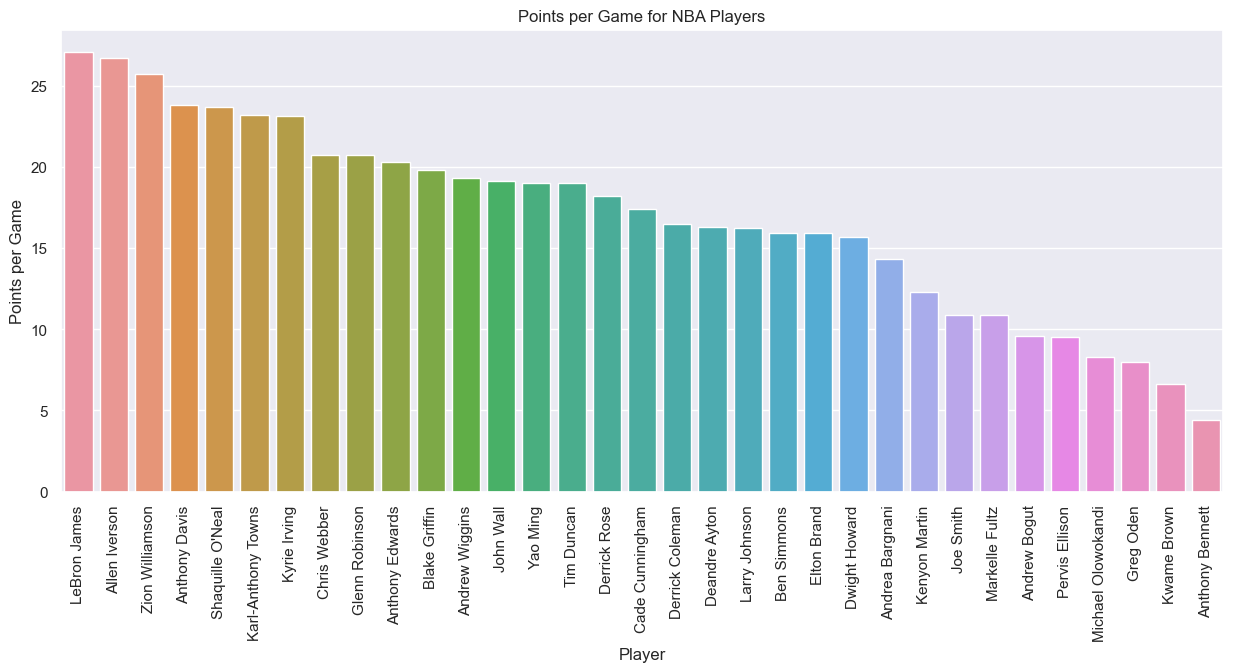

In [59]:

# create a figure object and set its size
fig = plt.figure(figsize=(15,6))
# create a bar chart of the points per game for each player
sns.barplot(x='player', y='points_per_game', data=sorted_df)

# set the title and labels for the chart
plt.title('Points per Game for NBA Players')
plt.xlabel('Player')
plt.ylabel('Points per Game')

# rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# show the chart
plt.show()


International Player Trend

In [60]:
df_all_season=pd.read_csv('all_seasons.csv')

In [61]:
df_all_season

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,12300,Markieff Morris,MIA,32.0,205.74,111.130040,Kansas,USA,2011,1,...,7.6,2.6,1.4,4.5,0.059,0.089,0.197,0.547,0.116,2021-22
12301,12301,Markelle Fultz,ORL,24.0,193.04,94.800728,Washington,USA,2017,1,...,10.8,2.7,5.5,-5.3,0.010,0.116,0.265,0.517,0.448,2021-22
12302,12302,Marcus Smart,BOS,28.0,193.04,99.790240,Oklahoma State,USA,2014,1,...,12.1,3.8,5.9,9.3,0.018,0.093,0.179,0.540,0.245,2021-22
12303,12303,Marcus Garrett,MIA,23.0,195.58,92.986360,Kansas,USA,Undrafted,Undrafted,...,1.1,1.9,0.6,5.8,0.072,0.108,0.086,0.280,0.069,2021-22


In [62]:
# Convert the birth_country column to a boolean value indicating whether the player is international or not
df_all_season['international'] = df_all_season['country'] != 'USA'

df_all_season


,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,international
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,False
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,False
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,False
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,False
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,12300,Markieff Morris,MIA,32.0,205.74,111.130040,Kansas,USA,2011,1,...,2.6,1.4,4.5,0.059,0.089,0.197,0.547,0.116,2021-22,False
12301,12301,Markelle Fultz,ORL,24.0,193.04,94.800728,Washington,USA,2017,1,...,2.7,5.5,-5.3,0.010,0.116,0.265,0.517,0.448,2021-22,False
12302,12302,Marcus Smart,BOS,28.0,193.04,99.790240,Oklahoma State,USA,2014,1,...,3.8,5.9,9.3,0.018,0.093,0.179,0.540,0.245,2021-22,False
12303,12303,Marcus Garrett,MIA,23.0,195.58,92.986360,Kansas,USA,Undrafted,Undrafted,...,1.9,0.6,5.8,0.072,0.108,0.086,0.280,0.069,2021-22,False


In [63]:
# Group the data by year and count the number of unique international players in each year
international_players_per_year = df_all_season[df_all_season['international']].groupby('draft_year')['player_name'].nunique()

In [64]:
international_players_per_year=international_players_per_year.iloc[:-1]


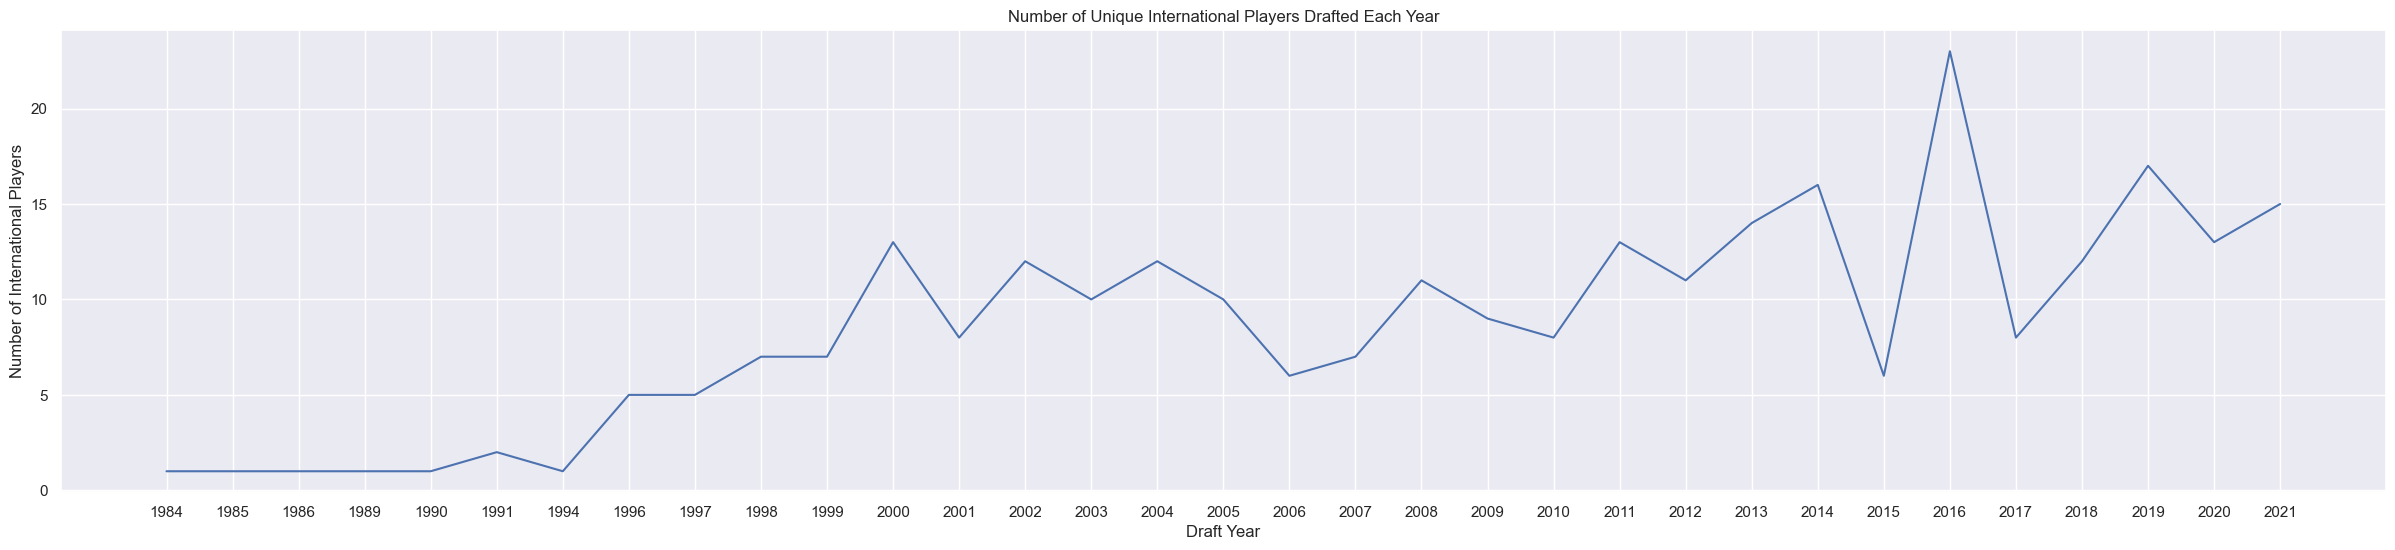

In [106]:
# plot the line chart for international_players_per_year
sns.lineplot(x=international_players_per_year.index, y=international_players_per_year.values)
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(30,6)})
plt.xlabel('Draft Year')
plt.ylabel('Number of International Players')
plt.title('Number of Unique International Players Drafted Each Year')
plt.show()

Players Colleges

In [107]:
# Count the number of players from each college and select the top 5
top_colleges = df['college'].value_counts().head(10)
top_colleges

Kentucky    58
Duke        57
Arizona     43
UNC         43
UCLA        42
Kansas      40
UConn       31
Syracuse    30
Michigan    29
Texas       29
Name: college, dtype: int64

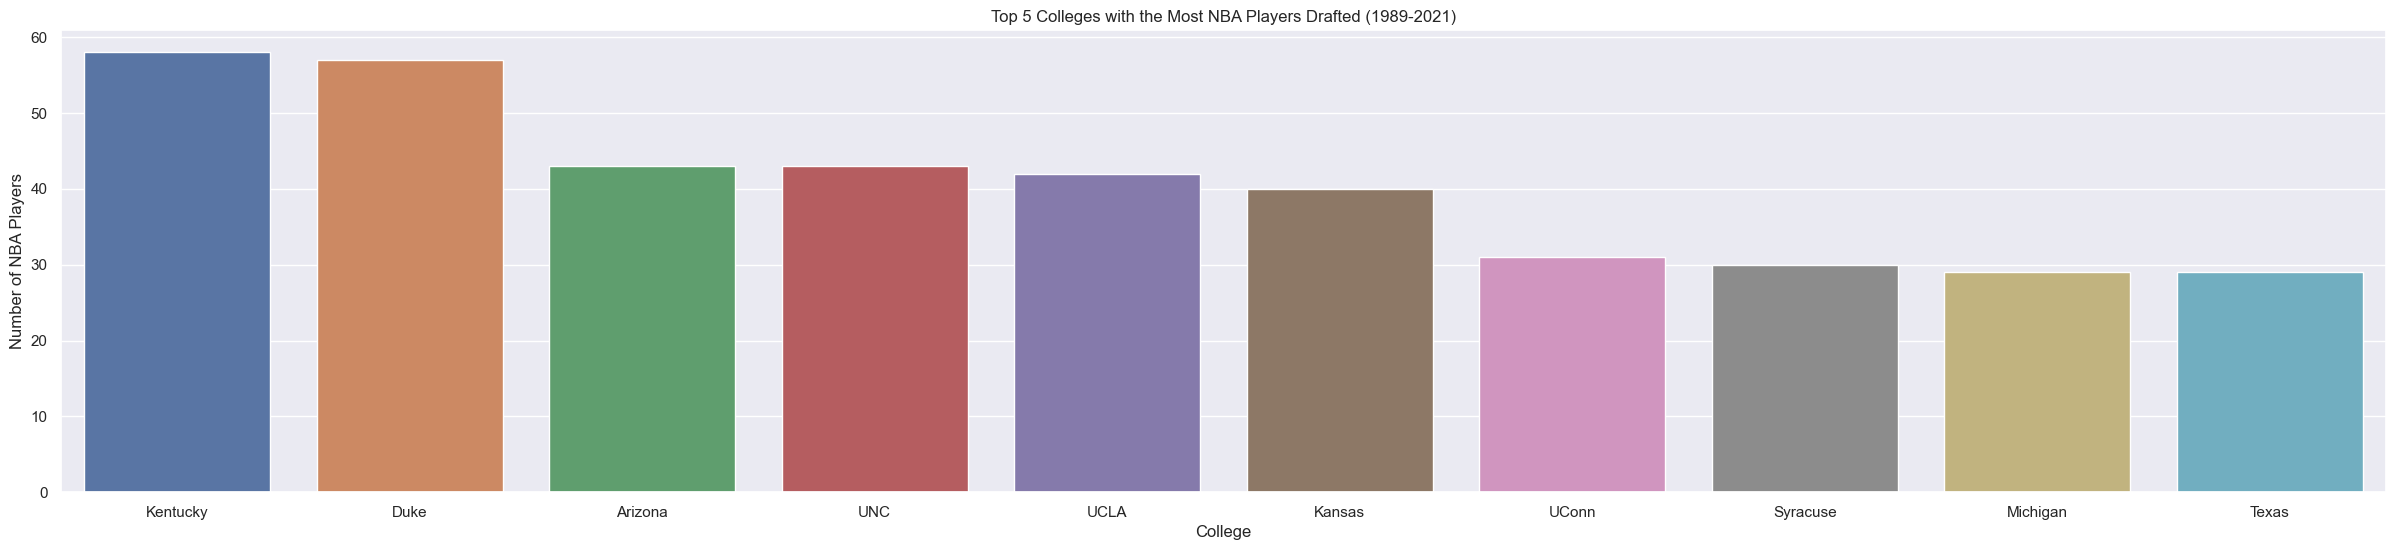

In [108]:
# Create a bar chart of the results
sns.barplot(x=top_colleges.index, y=top_colleges.values)
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(10,6)})
plt.xlabel('College')
plt.ylabel('Number of NBA Players')
plt.title('Top 5 Colleges with the Most NBA Players Drafted (1989-2021)')
plt.show()

# Data preprocessing for model building

In [68]:

# Select the unique rows that each player first occurs in
first_occurrences = df_all_season.drop_duplicates(subset="player_name", keep="first")
first_occurrences=first_occurrences.dropna()
first_occurrences = first_occurrences[first_occurrences['draft_year'] != 'Undrafted']
first_occurrences["draft_year"] = first_occurrences["draft_year"].astype(int)
# Drop the rows that have a draft year earlier than 1996
df_earlyCareer = first_occurrences[first_occurrences['draft_year'] >= 1996]
df_earlyCareer


,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,international
21,21,Erick Dampier,IND,21.0,210.82,120.201880,Mississippi State,USA,1996,1,...,4.1,0.6,-2.0,0.107,0.216,0.218,0.451,0.074,1996-97,False
30,30,Derek Fisher,LAL,22.0,185.42,90.718400,Arkansas-Little Rock,USA,1996,1,...,1.2,1.5,5.1,0.031,0.087,0.186,0.491,0.223,1996-97,False
68,68,Jamie Feick,SAS,22.0,203.20,115.665960,Michigan State,USA,1996,2,...,5.2,0.6,-12.2,0.133,0.253,0.150,0.405,0.065,1996-97,False
73,73,Jason Sasser,DAL,23.0,200.66,102.058200,Texas Tech,USA,1996,2,...,1.0,0.3,-24.2,0.018,0.140,0.172,0.413,0.067,1996-97,False
77,77,Jeff McInnis,DEN,22.0,193.04,86.182480,North Carolina,USA,1996,2,...,0.5,1.4,-17.8,0.021,0.040,0.259,0.609,0.327,1996-97,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12241,12241,Miles McBride,NYK,21.0,185.42,88.450440,West Virginia,USA,2021,2,...,1.1,1.0,13.0,0.011,0.097,0.137,0.393,0.159,2021-22,False
12258,12258,Nic Claxton,BKN,23.0,210.82,97.522280,Georgia,USA,2019,2,...,5.6,0.9,-0.4,0.098,0.157,0.150,0.672,0.066,2021-22,False
12261,12261,Neemias Queta,SAC,22.0,213.36,112.490816,Utah State,Portugal,2021,2,...,2.1,0.4,-4.1,0.104,0.144,0.176,0.495,0.076,2021-22,True
12279,12279,Luka Garza,DET,23.0,208.28,110.222856,Iowa,USA,2021,2,...,3.1,0.6,-6.3,0.130,0.116,0.195,0.535,0.086,2021-22,False


In [101]:
df_earlyCareer.to_csv('earlyCareer.csv', index=False)


## unsupervised machine learning
Cluster players into different positions in terms of their draft stats. Use clustering algorithms to group similar players together based on their attributes and NBA statistics, identify player's types and position(Guards,Fowards,Centers).

In [69]:
X=df_earlyCareer.iloc[:,[4,5,12,13,14]]

In [70]:
X

,player_height,player_weight,pts,reb,ast
21,210.82,120.201880,5.1,4.1,0.6
30,185.42,90.718400,3.9,1.2,1.5
68,203.20,115.665960,3.7,5.2,0.6
73,200.66,102.058200,2.4,1.0,0.3
77,193.04,86.182480,5.0,0.5,1.4
...,...,...,...,...,...
12241,185.42,88.450440,2.2,1.1,1.0
12258,210.82,97.522280,8.7,5.6,0.9
12261,213.36,112.490816,3.0,2.1,0.4
12279,208.28,110.222856,5.8,3.1,0.6


In [71]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

C:\Users\V\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [72]:
##cluster all players into three groups
clusters = kmeans.predict(X)

In [73]:
df_earlyCareer['cluster'] = list(clusters)


C:\Users\V\AppData\Local\Temp\ipykernel_14736\3493328668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_earlyCareer['cluster'] = list(clusters)


Exploring the patterns and insights in three groups


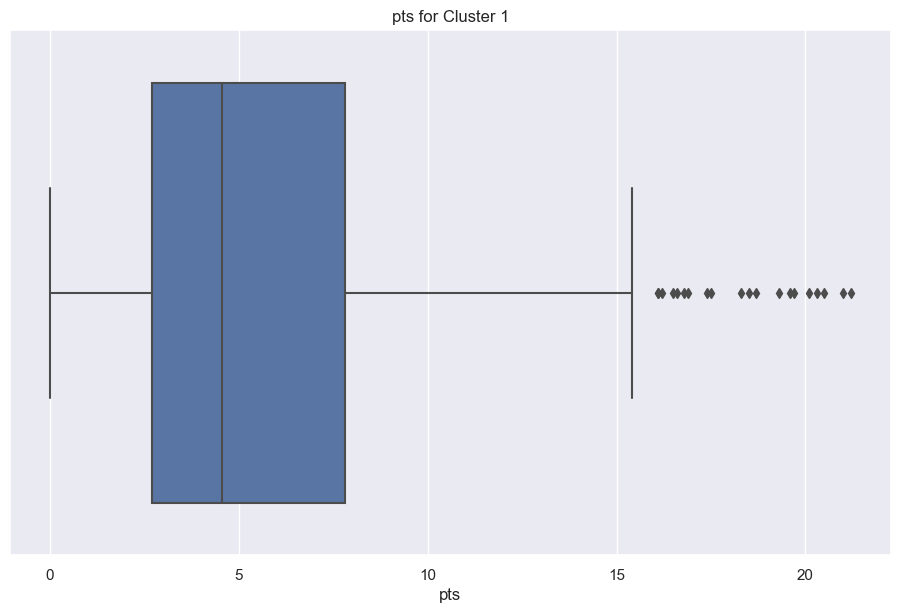

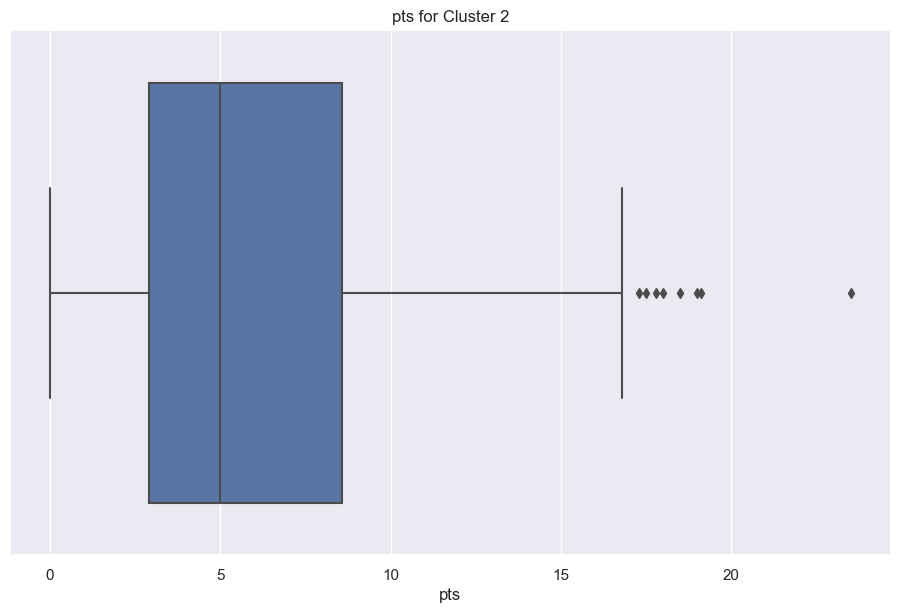

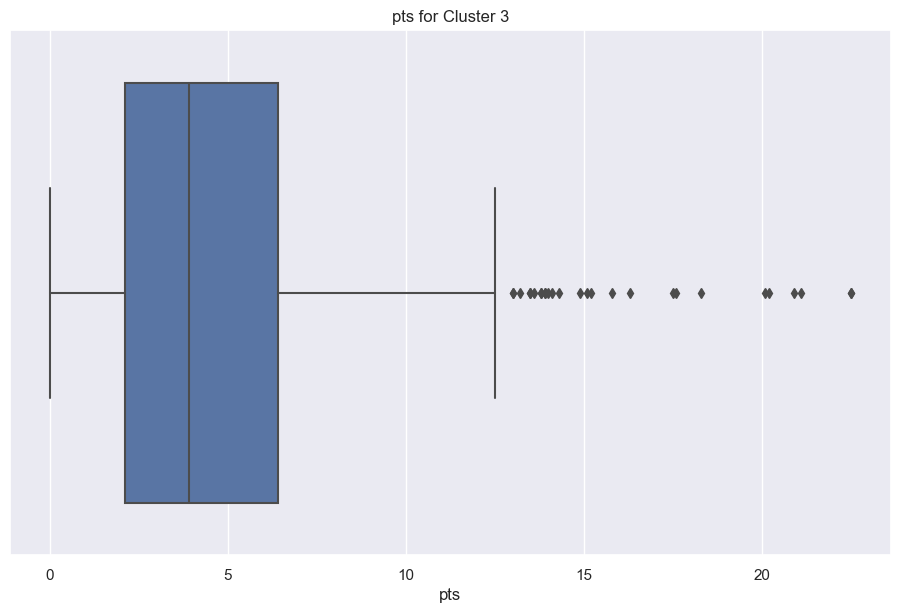

In [74]:
for i in [0,1,2]:
    plt.figure(figsize=(25,15))
    plt.subplot(2,2,i+1)
    plt.title('pts '+str(i+1))
    df_earlyCareer.query("cluster=="+str(i))
    sns.boxplot(df_earlyCareer.query("cluster=="+str(i)),x="pts")

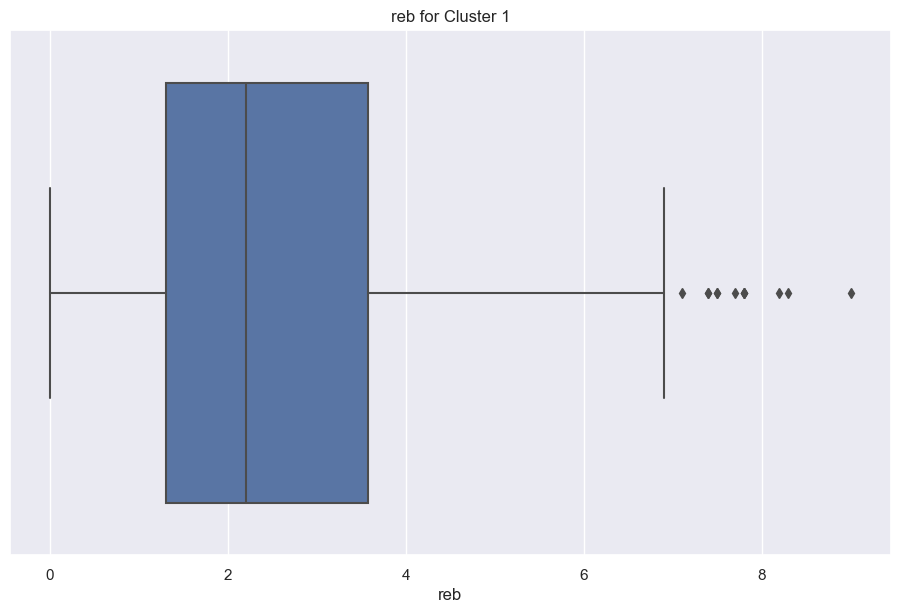

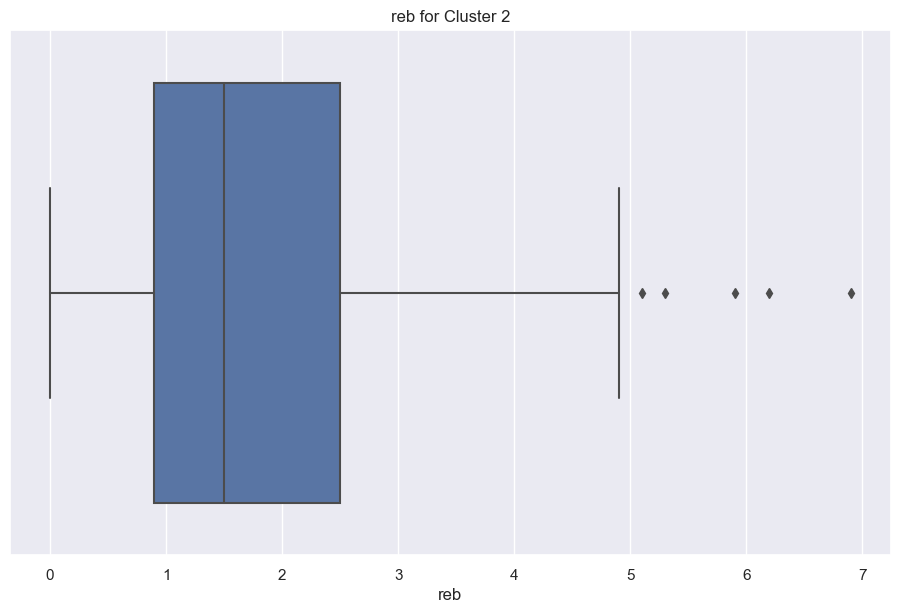

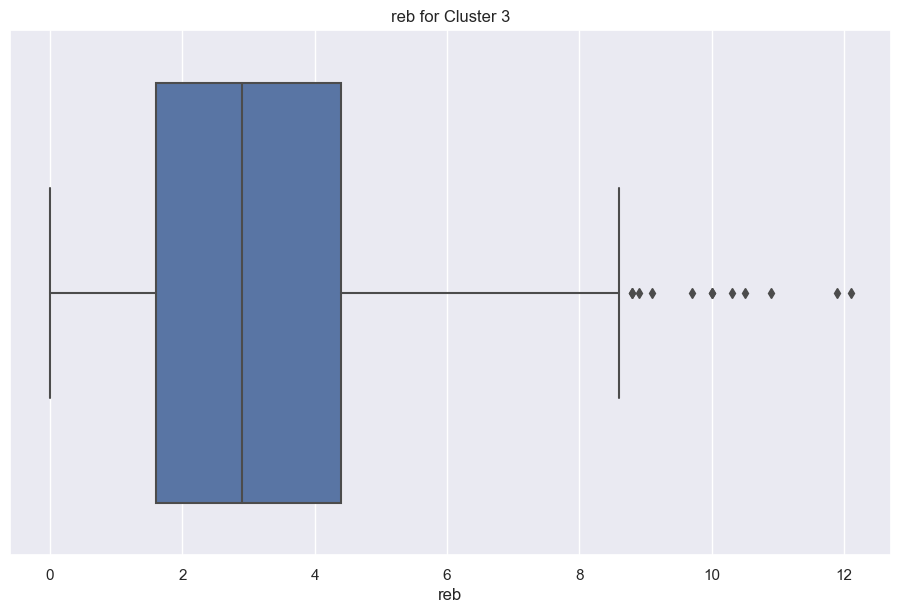

In [75]:
for i in [0,1,2]:
    plt.figure(figsize=(25,15))
    plt.subplot(2,2,i+1)
    plt.title('reb for Cluster '+str(i+1))
    df_earlyCareer.query("cluster=="+str(i))
    sns.boxplot(df_earlyCareer.query("cluster=="+str(i)),x="reb")

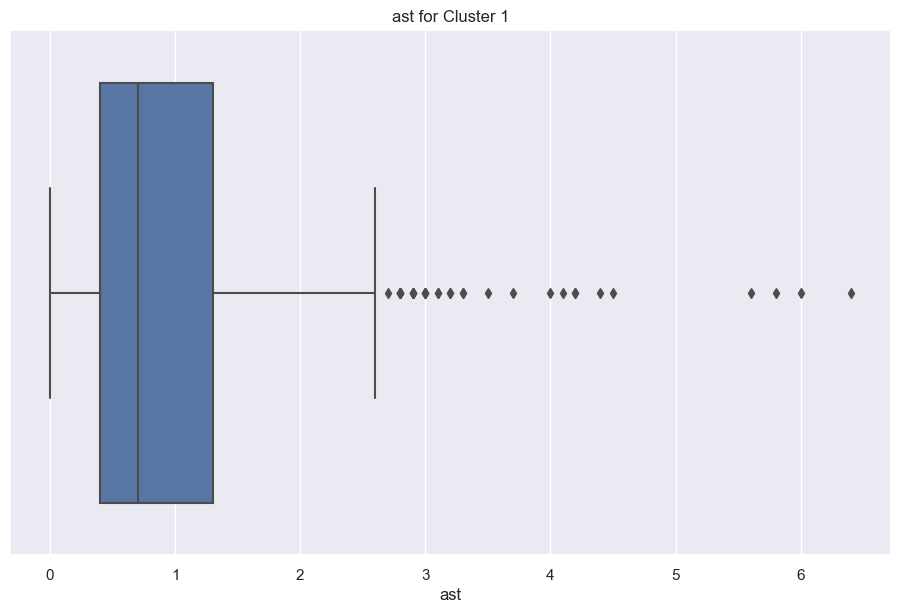

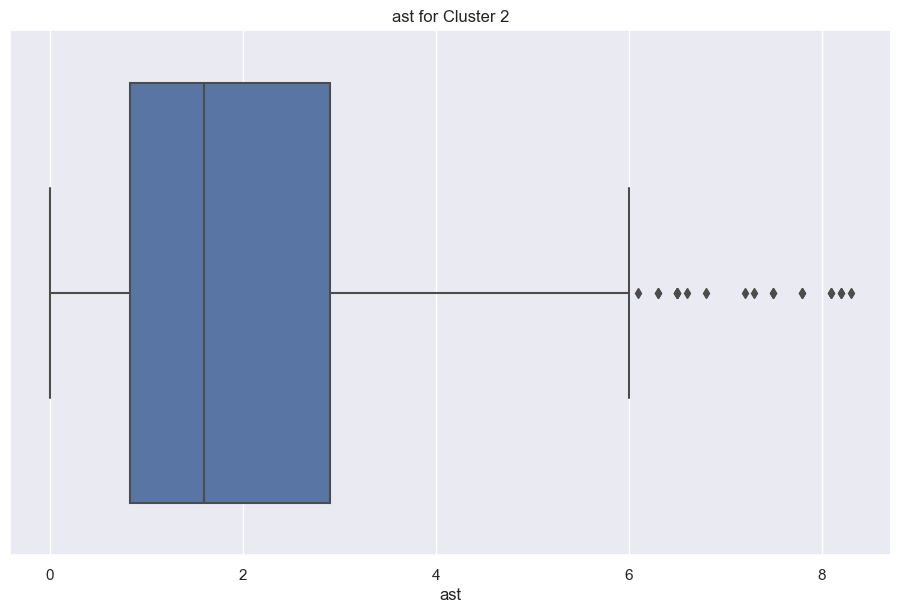

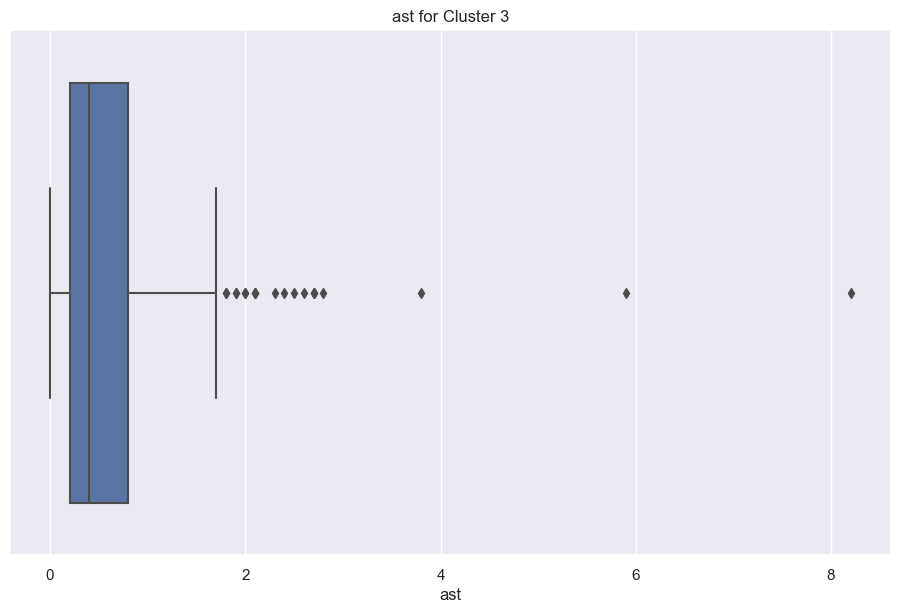

In [76]:
for i in [0,1,2]:
    plt.figure(figsize=(25,15))
    plt.subplot(2,2,i+1)
    plt.title('ast for Cluster '+str(i+1))
    df_earlyCareer.query("cluster=="+str(i))
    sns.boxplot(df_earlyCareer.query("cluster=="+str(i)),x="ast")

According to the stats pattern
Cluster1 is Foward/ Cluster2 is Guards/ Cluster3 is Center

## supervised machine learning
Predict if a player has potential to be a star player(who got high rank on dradt or selected to ALL-STAR game） or only a role palyer based on their statistics and attributes in early career.

In [77]:
df_earlyCareer


,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,international,cluster
21,21,Erick Dampier,IND,21.0,210.82,120.201880,Mississippi State,USA,1996,1,...,0.6,-2.0,0.107,0.216,0.218,0.451,0.074,1996-97,False,2
30,30,Derek Fisher,LAL,22.0,185.42,90.718400,Arkansas-Little Rock,USA,1996,1,...,1.5,5.1,0.031,0.087,0.186,0.491,0.223,1996-97,False,1
68,68,Jamie Feick,SAS,22.0,203.20,115.665960,Michigan State,USA,1996,2,...,0.6,-12.2,0.133,0.253,0.150,0.405,0.065,1996-97,False,2
73,73,Jason Sasser,DAL,23.0,200.66,102.058200,Texas Tech,USA,1996,2,...,0.3,-24.2,0.018,0.140,0.172,0.413,0.067,1996-97,False,0
77,77,Jeff McInnis,DEN,22.0,193.04,86.182480,North Carolina,USA,1996,2,...,1.4,-17.8,0.021,0.040,0.259,0.609,0.327,1996-97,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12241,12241,Miles McBride,NYK,21.0,185.42,88.450440,West Virginia,USA,2021,2,...,1.0,13.0,0.011,0.097,0.137,0.393,0.159,2021-22,False,1
12258,12258,Nic Claxton,BKN,23.0,210.82,97.522280,Georgia,USA,2019,2,...,0.9,-0.4,0.098,0.157,0.150,0.672,0.066,2021-22,False,0
12261,12261,Neemias Queta,SAC,22.0,213.36,112.490816,Utah State,Portugal,2021,2,...,0.4,-4.1,0.104,0.144,0.176,0.495,0.076,2021-22,True,2
12279,12279,Luka Garza,DET,23.0,208.28,110.222856,Iowa,USA,2021,2,...,0.6,-6.3,0.130,0.116,0.195,0.535,0.086,2021-22,False,2


In [78]:
##all star player from 1996-2021
All_star=['Kobe Bryant', 'Allen Iverson', 'Grant Hill', 'Michael Jordan', 'Karl Malone', "Shaquille O'Neal", 'Hakeem Olajuwon', 'Scottie Pippen', 'David Robinson', 'John Stockton', 'Tim Duncan', 'Kevin Garnett', 'Jason Kidd', 'Vince Carter', 'Ray Allen', 'Elton Brand', 'Steve Francis', 'Stephon Marbury', 'Brad Miller', 'Peja Stojakovic', 'Ben Wallace', 'Baron Davis', 'Jermaine O\'Neal', 'Zach Randolph', 'Gilbert Arenas', 'Chauncey Billups', 'Chris Bosh', 'Tyson Chandler', 'Chris Kaman', 'Yao Ming', 'Tracy McGrady', 'Dirk Nowitzki', 'Dwyane Wade', 'LeBron James', 'Carmelo Anthony', 'Chris Paul', 'Dwight Howard', 'Deron Williams', 'Russell Westbrook', 'Kevin Durant', 'Blake Griffin', 'Kevin Love', 'Paul George', 'Kyrie Irving', 'Kawhi Leonard', 'Giannis Antetokounmpo', 'DeMar DeRozan', 'Jimmy Butler', 'Joel Embiid', 'Kemba Walker', 'Khris Middleton', 'Domantas Sabonis', 'Jayson Tatum', 'Zion Williamson', 'Donovan Mitchell', 'Rudy Gobert', 'Damian Lillard', 'Luka Doncic', 'Nikola Jokic', 'Devin Booker', 'Anthony Davis', 'Zach LaVine']


In [79]:
##add a new colomn to label all star player
df_earlyCareer['is_all_star'] = df_earlyCareer['player_name'].apply(lambda x: x in All_star)


C:\Users\V\AppData\Local\Temp\ipykernel_14736\378692755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_earlyCareer['is_all_star'] = df_earlyCareer['player_name'].apply(lambda x: x in All_star)


In [80]:
df_earlyCareer[200:300]

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,international,cluster,is_all_star
1923,1923,Dan Langhi,HOU,23.0,210.82,99.790240,Vanderbilt,USA,2000,2,...,-11.3,0.057,0.126,0.222,0.403,0.031,2000-01,False,0,False
1928,1928,Chris Mihm,CLE,21.0,215.90,120.201880,Texas,USA,2000,1,...,-3.8,0.106,0.167,0.203,0.500,0.024,2000-01,False,2,False
1931,1931,Chris Porter,GSW,23.0,200.66,98.883056,Auburn,USA,2000,2,...,-13.4,0.071,0.103,0.204,0.434,0.088,2000-01,False,0,False
1944,1944,Courtney Alexander,WAS,24.0,195.58,92.986360,Fresno State,USA,2000,1,...,-10.1,0.036,0.085,0.232,0.484,0.083,2000-01,False,0,False
1947,1947,Dalibor Bagaric,CHI,20.0,215.90,125.644984,None,Croatia,2000,1,...,-15.3,0.091,0.158,0.174,0.304,0.065,2000-01,True,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2751,2751,Dan Gadzuric,MIL,25.0,210.82,108.862080,UCLA,Netherlands,2002,2,...,-2.3,0.099,0.198,0.119,0.498,0.018,2002-03,True,2,False
2757,2757,Igor Rakocevic,MIN,25.0,187.96,83.460928,None,Serbia and Montenegro,2000,2,...,10.2,0.021,0.059,0.182,0.528,0.202,2002-03,True,1,False
2762,2762,Guy Rucker,GSW,25.0,205.74,122.469840,Iowa,USA,1999,Undrafted,...,-53.6,0.000,0.333,0.000,0.000,0.500,2002-03,False,2,False
2768,2768,Gordan Giricek,ORL,26.0,198.12,97.975872,None,Croatia,1999,2,...,-3.6,0.019,0.105,0.212,0.529,0.108,2002-03,True,0,False


In [97]:
all_star_rows = df_earlyCareer[df_earlyCareer['is_all_star'] == 1]

In [98]:
all_star_rows

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,international,cluster,is_all_star
78,78,Jermaine O'Neal,POR,18.0,210.82,102.511792,None,USA,1996,1,...,1.3,0.099,0.198,0.199,0.494,0.030,1996-97,False,2,1
147,147,Allen Iverson,PHI,22.0,182.88,74.842680,Georgetown,USA,1996,1,...,-7.0,0.040,0.072,0.284,0.513,0.320,1996-97,False,1,1
254,254,Ray Allen,MIL,21.0,195.58,92.986360,Connecticut,USA,1996,1,...,-2.0,0.046,0.109,0.211,0.541,0.133,1996-97,False,0,1
307,307,Stephon Marbury,MIN,20.0,187.96,81.646560,Georgia Tech,USA,1996,1,...,-3.1,0.028,0.066,0.244,0.519,0.373,1996-97,False,1,1
342,342,Kobe Bryant,LAL,18.0,200.66,90.718400,None,USA,1996,1,...,2.2,0.048,0.084,0.244,0.544,0.144,1996-97,False,0,1
567,567,Tim Duncan,SAS,22.0,213.36,112.490816,Wake Forest,US Virgin Islands,1997,1,...,8.0,0.108,0.238,0.262,0.577,0.131,1997-98,True,2,1
574,574,Tracy McGrady,TOR,19.0,203.20,95.254320,None,USA,1997,1,...,-9.5,0.095,0.155,0.187,0.505,0.136,1997-98,False,0,1
680,680,Chauncey Billups,TOR,21.0,190.50,91.625584,Colorado,USA,1997,1,...,-10.6,0.029,0.072,0.203,0.516,0.242,1997-98,False,1,1
1005,1005,Vince Carter,TOR,22.0,200.66,97.522280,North Carolina,USA,1998,1,...,1.2,0.061,0.127,0.257,0.516,0.164,1998-99,False,0,1
1171,1171,Peja Stojakovic,SAC,22.0,205.74,103.872568,None,Serbia and Montenegro,1996,1,...,1.3,0.045,0.108,0.195,0.496,0.115,1998-99,True,0,1


In [83]:
##replace is_all_star type with numerical category 
encoder = preprocessing.LabelEncoder()
df_earlyCareer['is_all_star']=encoder.fit_transform(df_earlyCareer['is_all_star'])
df_earlyCareer
##0=false 1=true

C:\Users\V\AppData\Local\Temp\ipykernel_14736\2787744988.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_earlyCareer['is_all_star']=encoder.fit_transform(df_earlyCareer['is_all_star'])


,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,international,cluster,is_all_star
21,21,Erick Dampier,IND,21.0,210.82,120.201880,Mississippi State,USA,1996,1,...,-2.0,0.107,0.216,0.218,0.451,0.074,1996-97,False,2,0
30,30,Derek Fisher,LAL,22.0,185.42,90.718400,Arkansas-Little Rock,USA,1996,1,...,5.1,0.031,0.087,0.186,0.491,0.223,1996-97,False,1,0
68,68,Jamie Feick,SAS,22.0,203.20,115.665960,Michigan State,USA,1996,2,...,-12.2,0.133,0.253,0.150,0.405,0.065,1996-97,False,2,0
73,73,Jason Sasser,DAL,23.0,200.66,102.058200,Texas Tech,USA,1996,2,...,-24.2,0.018,0.140,0.172,0.413,0.067,1996-97,False,0,0
77,77,Jeff McInnis,DEN,22.0,193.04,86.182480,North Carolina,USA,1996,2,...,-17.8,0.021,0.040,0.259,0.609,0.327,1996-97,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12241,12241,Miles McBride,NYK,21.0,185.42,88.450440,West Virginia,USA,2021,2,...,13.0,0.011,0.097,0.137,0.393,0.159,2021-22,False,1,0
12258,12258,Nic Claxton,BKN,23.0,210.82,97.522280,Georgia,USA,2019,2,...,-0.4,0.098,0.157,0.150,0.672,0.066,2021-22,False,0,0
12261,12261,Neemias Queta,SAC,22.0,213.36,112.490816,Utah State,Portugal,2021,2,...,-4.1,0.104,0.144,0.176,0.495,0.076,2021-22,True,2,0
12279,12279,Luka Garza,DET,23.0,208.28,110.222856,Iowa,USA,2021,2,...,-6.3,0.130,0.116,0.195,0.535,0.086,2021-22,False,2,0


In [84]:
## selct the data
X=df_earlyCareer.iloc[:,[4,5,12,13,14]]
y=df_earlyCareer.iloc[:,-1]

In [85]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=32)


In [86]:
import pandas as pd
import numpy as np
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [87]:





# Oversample the minority class using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define the ANN model
def create_ann_model():
    ann_model = Sequential()
    nn_model.add(Dense(10, input_dim=X_train_smote.shape[1], activation='relu'))
    ann_model.add(Dense(1, activation='sigmoid'))
    ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return ann_model

# Wrap the ANN model with KerasClassifier
ann_model = KerasClassifier(build_fn=create_ann_model, epochs=50, batch_size=32, verbose=0)

# Define the base models
base_models = [
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('ann', ann_model)
]

# Define the meta-model
meta_model = LogisticRegression()

# Create the stacking classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Fit the stacking classifier to the oversampled training data
stacking_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
y_pred = stacking_model.predict(X_test)

# Evaluate the performance of the model
print(classification_report(y_test, y_pred))

C:\Users\V\AppData\Local\Temp\ipykernel_14736\1102744724.py:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model = KerasClassifier(build_fn=create_ann_model, epochs=50, batch_size=32, verbose=0)


13/13 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       389
           1       0.16      0.25      0.19        20

    accuracy                           0.90       409
   macro avg       0.56      0.59      0.57       409
weighted avg       0.92      0.90      0.91       409



In [113]:
accuracy=accuracy_score(y_test,y_pred)
accuracy


0.8973105134474327

In [96]:
##save the logistics regression model
import pickle
#Save the model to file
with open('cluster.pkl','wb') as file:
    pickle.dump(model,file)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dropout
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-03-28 23:16:30         2074
metadata.json                                  2023-03-28 23:16:30           64
variables.h5                                   2023-03-28 23:16:30        26904


In [100]:
##save the stacking model
import pickle
#Save the  to file
with open('classification.pkl','wb') as file:
    pickle.dump(stacking_model,file)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
.........6
.........7
.........8
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-03-29 14:29:45         1397
metadata.json                                  2023-03-29 14:29:45           64
variables.h5                                   2023-03-29 14:29:45        19424
